In [1]:
import numpy as np
import random

In [2]:
def generate_data(n_samples=10, n_features=1, n_targets=1, bias=0.0, noise=0.0, seed=None):
    
    generator = np.random.RandomState(seed) if seed != None else np.random
        
    X = generator.randn(n_samples, n_features)
    corr = 100 * generator.rand(n_features, n_targets)
    y = np.dot(X, corr) + bias
    
    # adding nosie to the target
    if noise > 0.0:
        y += generator.normal(scale=noise, size=y.shape)
        
    # removing extra dimensions for the target 
    y = np.squeeze(y)
                                                           
    return X, y

In [6]:
class linear_regressor:
    def __init__(self, learning_rate=0.01, iterations=100):
        self.w = 0
        self.b = 0
        self.X = 0
        self.y = 0
        self.n = 0
        self.iterations = iterations
        self.alpha = learning_rate
        
    def fit(self, X, y, verbose=False):
        
        self.X = X
        self.y = y
        self.n = y.shape[0]
        self.w = np.random.rand((self.X.shape[1]))
        
        for i in range(self.iterations):
            if verbose and i%20==0:
                print(f"Iteration {i} loss:{self.calc_loss(self.X):2f}")
                
            y_hat = self.predict(self.X)
            self.w -= - 2 / self.n * self.alpha * np.sum(self.X.T * (self.y - y_hat),axis=1)
            self.b -= - 2 / self.n * self.alpha * np.sum(self.y - y_hat)
        print(f"Model Trained on {self.n} data points with final loss {self.calc_loss(self.X)}")
            
    def predict(self, pred_X):
        return np.squeeze(np.sum(self.w * pred_X + self.b, axis=1))
        
    def calc_loss(self, X):
        return np.sum((self.y - self.predict(X))**2) / self.n

In [7]:
X, y = generate_data(n_samples=100, n_features=2, noise=5, bias=5)

In [8]:
reg = linear_regressor(iterations=100)
reg.fit(X, y, verbose=True)
y_hat = reg.predict(X)

Iteration 0 loss:297.043631
Iteration 20 loss:129.814591
Iteration 40 loss:63.742966
Iteration 60 loss:37.317623
Iteration 80 loss:26.665926
Model Trained on 100 data points with final loss 22.345477092215987


<AxesSubplot:title={'center':'2D Compressed Plot'}, xlabel='X1 Feature', ylabel='Y Value'>

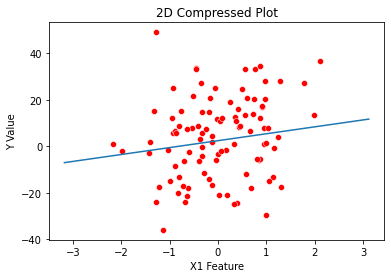

In [10]:
# 2D plot
import seaborn as sns
import matplotlib.pyplot as plt

plotX = np.linspace(X[:,0].min()-1,X[:,0].max()+1,100)
plotY = reg.w[0]*plotX + reg.b

plt.xlabel("X1 Feature")
plt.ylabel("Y Value")
plt.title("2D Compressed Plot")

sns.lineplot(x=plotX, y=plotY)
sns.scatterplot(x=X[:,0], y=y, color="red")

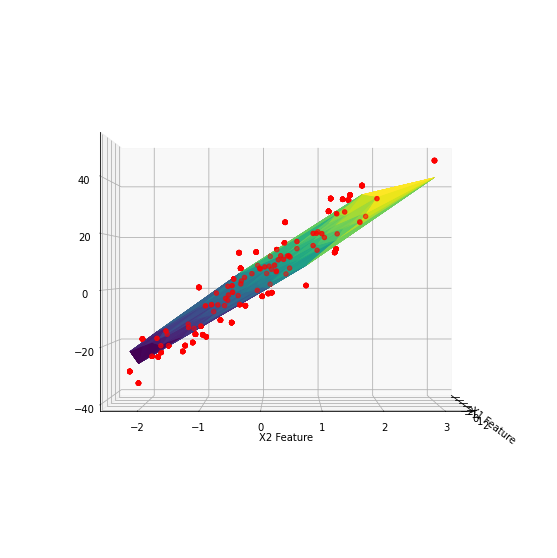

In [16]:
# 3D plot
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import display, clear_output

if X.shape[1]==2:
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    plt.xlabel('X1 Feature')
    plt.ylabel('X2 Feature')

    for i in np.linspace(0,360, 16):
        ax.plot_trisurf(X[:,0], X[:,1], y_hat, cmap=plt.cm.viridis, linewidth=1)
        ax.scatter(X[:,0], X[:,1], y, c='red')
        ax.view_init(0, i)
        display(fig)
        clear_output(wait = True)